# Exploratory Data Analysis

## Synthèse
### Analyse de forme

- **Variable target :** SARS-Cov-2 exam result
- **Lignes et Colonnes :** 5644 lignes et 111 colonnes
- **Types de variables :** 70 qualitatives et 41 quantitatives
- **Analyse des valeurs manquantes :** 
 - Beaucoup de Nan dans les données
 - Un groupe de données inexploitables >90% de Nan
 - Un groupe de données sanguins entre 85% - 90% de Nan
 - Un groupe de données virales entre 75% - 85% de Nan
 
### Analyse de Fond

- **Visualisation de la target :**
 - 2 valeurs possibles 'positive' et 'negative'
 - 10% des valeurs sont 'negative'
 - 90% des valeurs sont 'positive'
- **Signification des variables :**
 - Les variables continues semblent représenter des tests sanguins et virales avec une distribution gaussienne ou asymétrique
 - Les variables qualitatives binaire ont pour la plupart la même valeurs sauf pour le Rhinovirus
 - Le feature 'Patient age quantile' semble regrouper l'âge par groupe dont on ne connait pas les spécificitées
- **Relation Variables/Target :**
 - La relation blood/target semble montrer une corrélation avec le taux de Meunocytes, Paletes et Leukocytes
 - La relation viral/target montre rarement la présence d'une double maladie. Le Rhinovirus positif semble donner un résultat négatif au covid
 - La relation age/target semble montrer une différence pour les ages quantiles 1, 2 et 3
- **Relations entre les variables :**
 - La relation blood/blood semble montrer quelques corrélations avec certains groupes de variables
 - La relation age/blood semble montrer aucune corrélation
 - La relation viral/viral semble montrer que le rapid test est peu fiable
 - La relation malade/blood semble différent pour le covid pour certaines données telles que les platelets
 - La relation hospilation/blood semble donner plusieurs informations pour plus tard
- **Analyse des données NaN:**
 - Pour les données 'viral', on a un ratio 98/8 de cas négatif/positif
 - Pour les données 'blood', on a un ratio 87/13 de cas négatif/positif
- **Test d'hypothèse:**
 - Pour une hypothèse H0:"les données moyennes 'blood' sont égaux pour les patients positifs et négatifs au covid", le test de Student rejète l'hypothèse avec un risque de alpha=2%. Les individus atteints du covid-19 ont des données moyens 'blood' significativements différents.
 - Pour une hypothèse H0:"les données moyennes 'viral' sont égaux pour les patients positifs et négatifs au covid", le test de Student rejète l'hypothèse avec un risque de alpha=2%. Les individus atteints du covid-19 ont des données moyens 'trivial' significativements différents.

## Analyse de la forme des données

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
covid = pd.read_excel('dataset.xlsx')
pd.set_option('display.max_row',111)
pd.set_option('display.max_column',111)
covid.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW)  Serum Glucose  \
0                                      NaN            NaN   
1                                -0.625073      -0.140648   
2                                      NaN            NaN   
3                                      NaN            NaN   
4                                      NaN            NaN   

  Respiratory Syncytial Virus   Influenza A   Influenza B Parainfluenza 1  \
0                         NaN           NaN           NaN             NaN   
1                not_detected  not_detected  not_detected    not_detected   
2                         NaN           NaN           NaN             NaN   
3                         NaN           NaN           NaN             NaN   
4                not_detected  not_detected  not_detected    not_detected   

  CoronavirusNL63 Rhinovirus/Enterovirus  Mycoplasma pneumoniae  \
0             NaN                    

Le nombre de données est de  5644
Le nombre de variable est de  111
La target est :  SARS-Cov-2 exam result
Il y a 558 targets positives
Voici les types de variables : 
float64    70
object     37
int64       4
dtype: int64


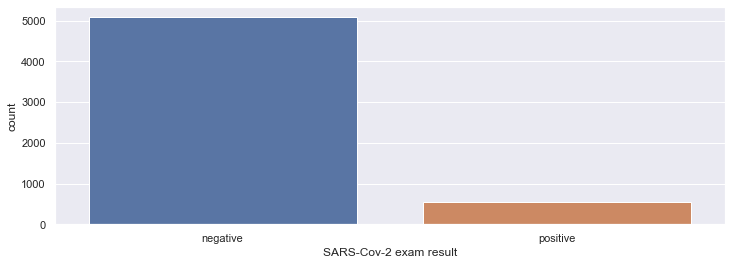

In [4]:
df = covid.copy()
n, m = df.shape
target = 'SARS-Cov-2 exam result'
n_positive = df['SARS-Cov-2 exam result'].value_counts()[1]

print('Le nombre de données est de ', n)
print('Le nombre de variable est de ', m)

n_target = df[df[target]=='positive'].shape[0]

print('La target est : ', target)
print(f'Il y a {n_target} targets positives')
print('Voici les types de variables : ')
print(df.dtypes.value_counts())

plt.figure(figsize=(12,4))
sns.set()
sns.countplot(df[target])
plt.show()

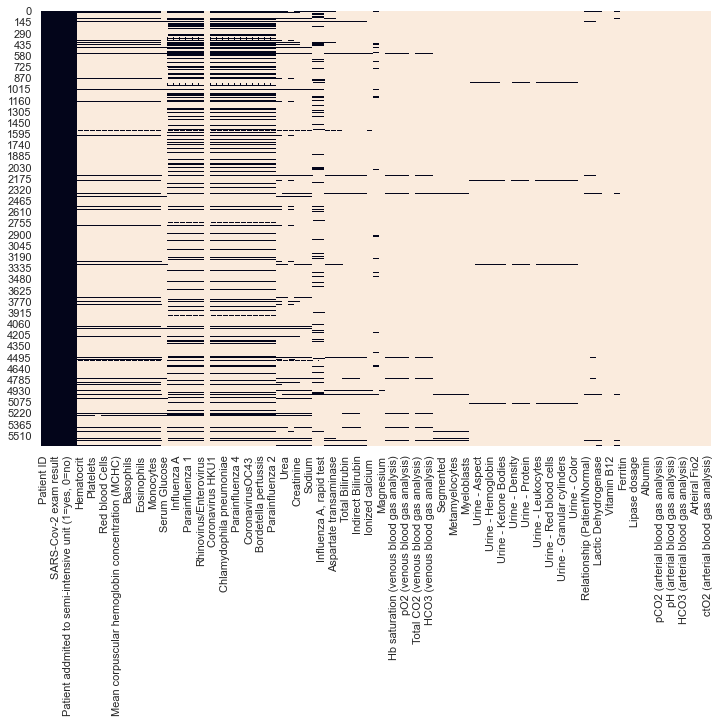

Les proportions de données manquantes :
Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Influenza B                                              0.760099
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Rhinovirus/Enterovirus                                   0.760454
Inf A H1N1 2009                                          0.760454
CoronavirusOC43                                          0.760454
Coronavirus229E                                          0.760454
Parainfluenza 4                                          0.760454
Adenovirus                          

In [5]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isna(), cbar=False)
plt.show()

print('Les proportions de données manquantes :')
print((df.isna().sum()/n).sort_values())

In [6]:
df = df[df.columns[(df.isna().sum()/n) < 0.9]]
df = df.drop('Patient ID', axis = 1)
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2           

## Analyse de fond des données

In [7]:
n, m = df.shape
n_positive = df['SARS-Cov-2 exam result'].value_counts()[1]

print('Le nombre de données est de ', n)
print('Le nombre de variable est de ', m)

target = 'SARS-Cov-2 exam result'
n_target = df[df[target]=='positive'].shape[0]

print('La target est : ', target)
print(f'Il y a {n_target} targets positives')
print('Voici les types de variables : ')
print(df.dtypes.value_counts())

Le nombre de données est de  5644
Le nombre de variable est de  38
La target est :  SARS-Cov-2 exam result
Il y a 558 targets positives
Voici les types de variables : 
object     20
float64    14
int64       4
dtype: int64


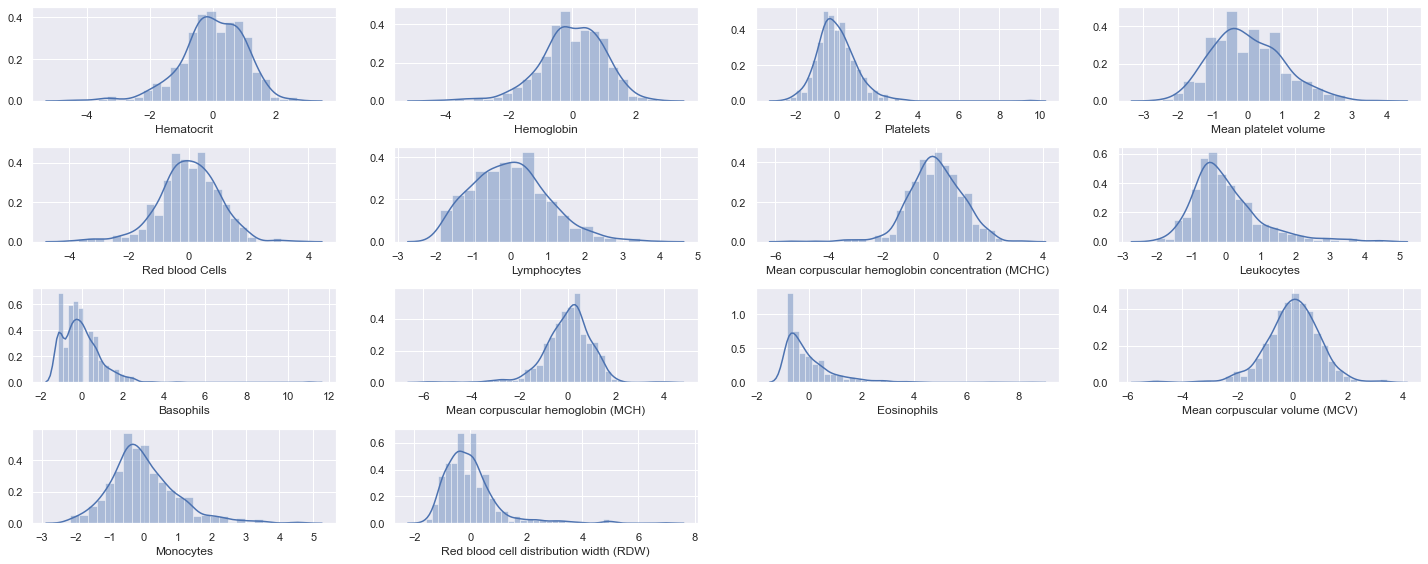

In [8]:
p = int(np.sqrt(df.columns[df.dtypes == 'float64'].size))+1
plt.figure(figsize=(20,8))
i = 0
for var in df.columns[df.dtypes == 'float64']:
    plt.subplot(p,p,i+1)
    sns.distplot(df[var])
    i += 1
plt.tight_layout()
plt.show()

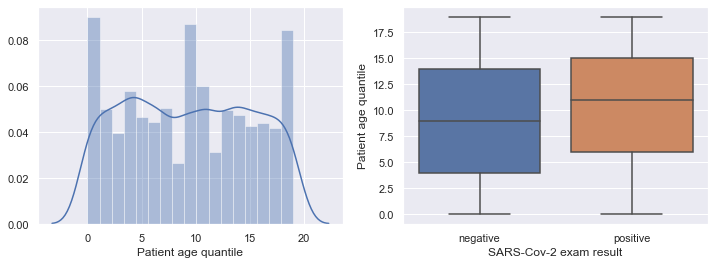

In [9]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
sns.distplot(df['Patient age quantile'])
plt.subplot(122)
sns.boxplot(x=target, y='Patient age quantile', data=df)
plt.show()

In [10]:
for col in df.select_dtypes('object'):
    print(f'Pour la variable {col :-<40} on a les éléments {df[col].unique()}')

Pour la variable SARS-Cov-2 exam result------------------ on a les éléments ['negative' 'positive']
Pour la variable Respiratory Syncytial Virus------------- on a les éléments [nan 'not_detected' 'detected']
Pour la variable Influenza A----------------------------- on a les éléments [nan 'not_detected' 'detected']
Pour la variable Influenza B----------------------------- on a les éléments [nan 'not_detected' 'detected']
Pour la variable Parainfluenza 1------------------------- on a les éléments [nan 'not_detected' 'detected']
Pour la variable CoronavirusNL63------------------------- on a les éléments [nan 'not_detected' 'detected']
Pour la variable Rhinovirus/Enterovirus------------------ on a les éléments [nan 'detected' 'not_detected']
Pour la variable Coronavirus HKU1------------------------ on a les éléments [nan 'not_detected' 'detected']
Pour la variable Parainfluenza 3------------------------- on a les éléments [nan 'not_detected' 'detected']
Pour la variable Chlamydophila pneum

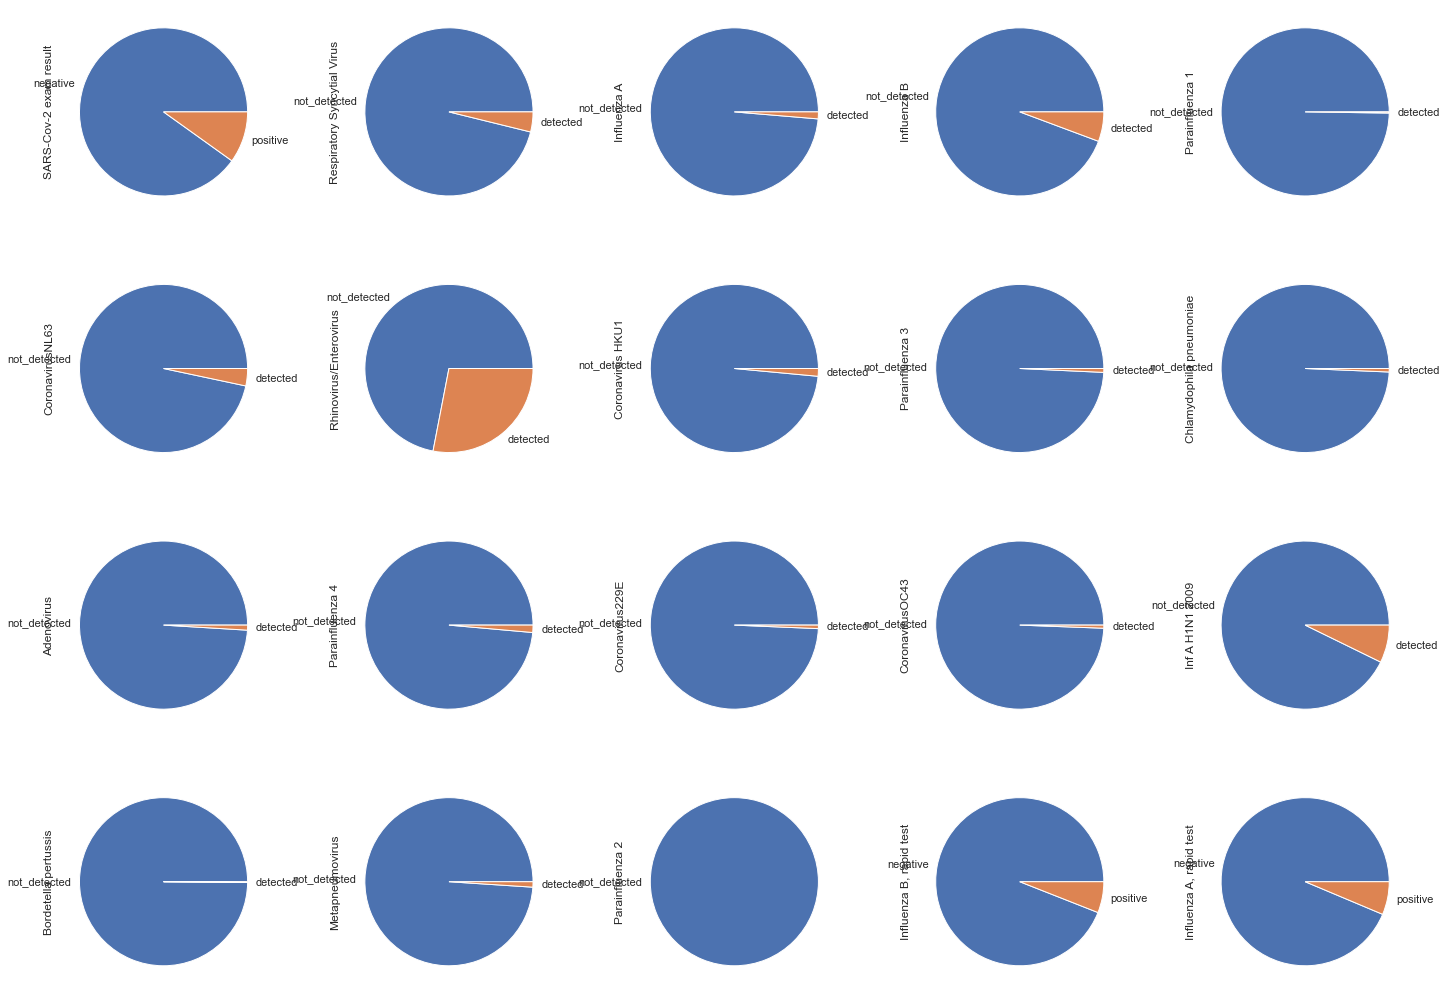

In [11]:
p = int(np.sqrt(df.columns[df.dtypes == 'object'].size))+1
plt.figure(figsize=(20,18))
i = 0
for var in df.columns[df.dtypes == 'object']:
    plt.subplot(p, p, i+1)
    df[var].value_counts().plot.pie()
    i += 1
plt.tight_layout()
plt.show()

In [12]:
df_positive = df[df['SARS-Cov-2 exam result'] == 'positive']
df_negative = df[df['SARS-Cov-2 exam result'] == 'negative']
rate = df.isna().sum()/n
blood_var = df.columns[(rate > 0.88) & (rate < 0.9)]
viral_var = df.columns[(rate > 0.75) & (rate < 0.88)]

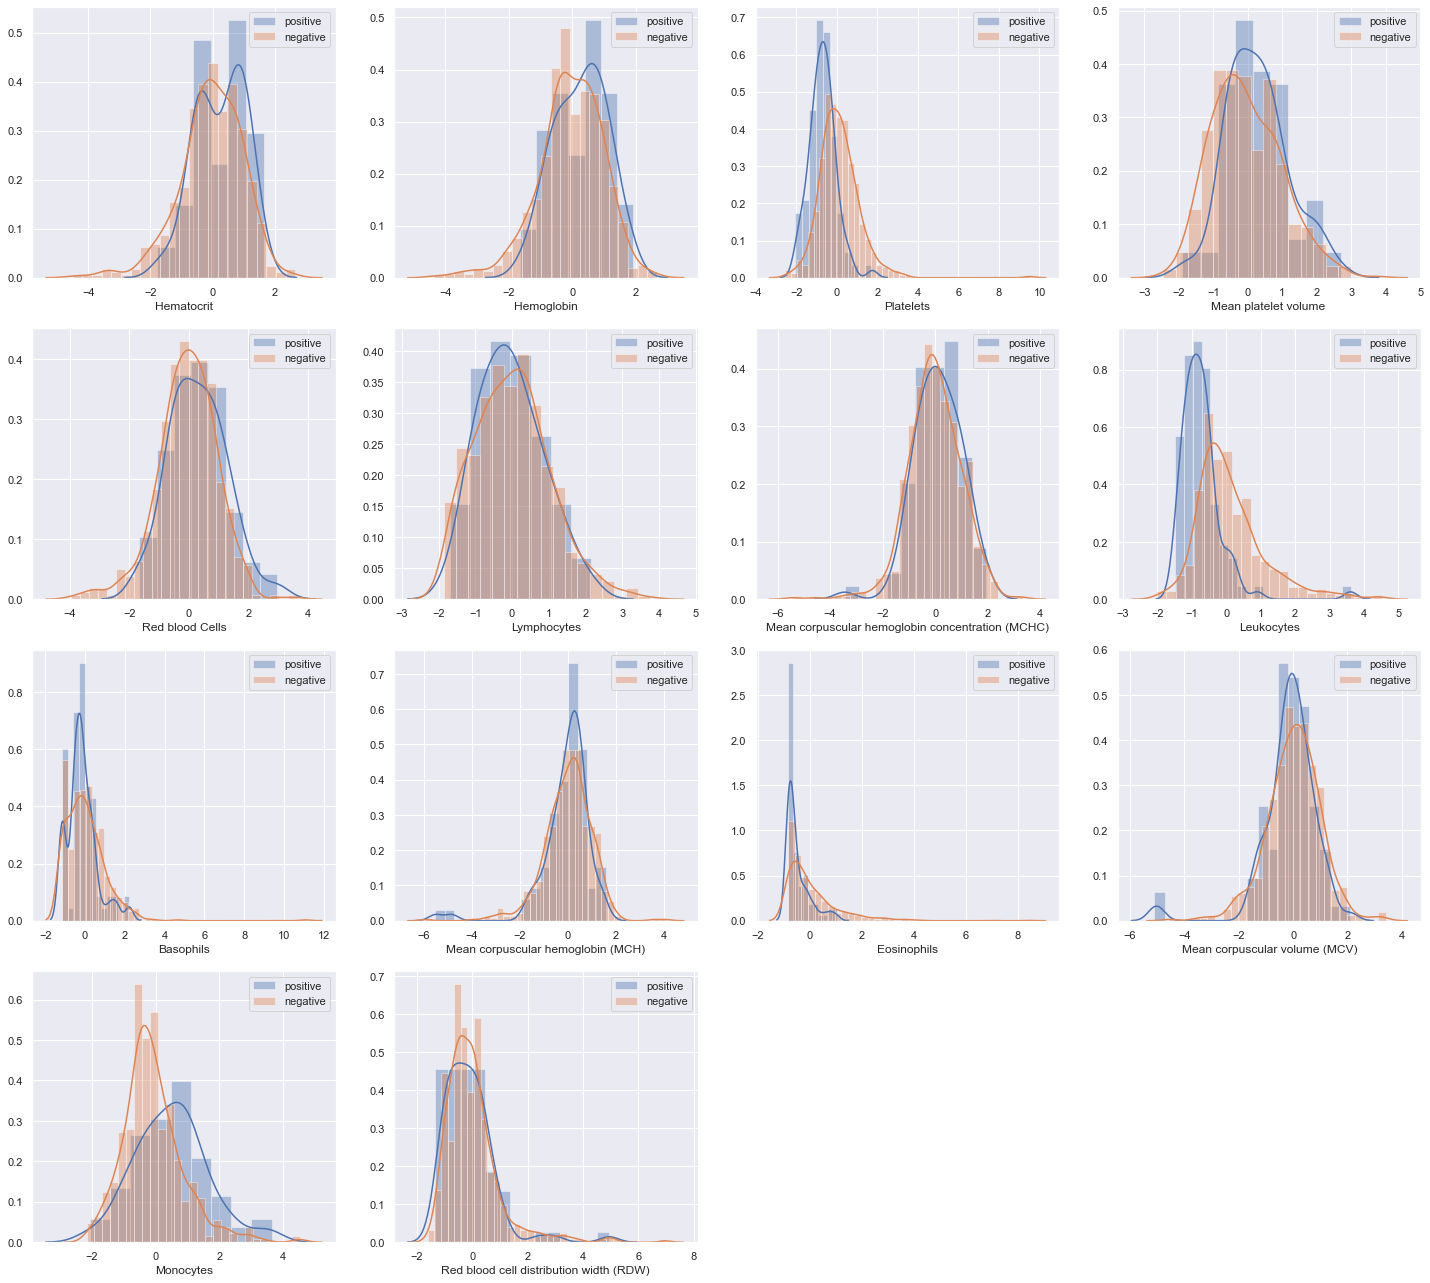

In [13]:
p = int(np.sqrt(blood_var.size))+1
plt.figure(figsize=(20,18))
i = 0
for var in blood_var:
    plt.subplot(p, p, i+1)
    sns.distplot(df_positive[var], label='positive')
    sns.distplot(df_negative[var], label='negative')
    plt.legend()
    i += 1
plt.tight_layout()
plt.show()

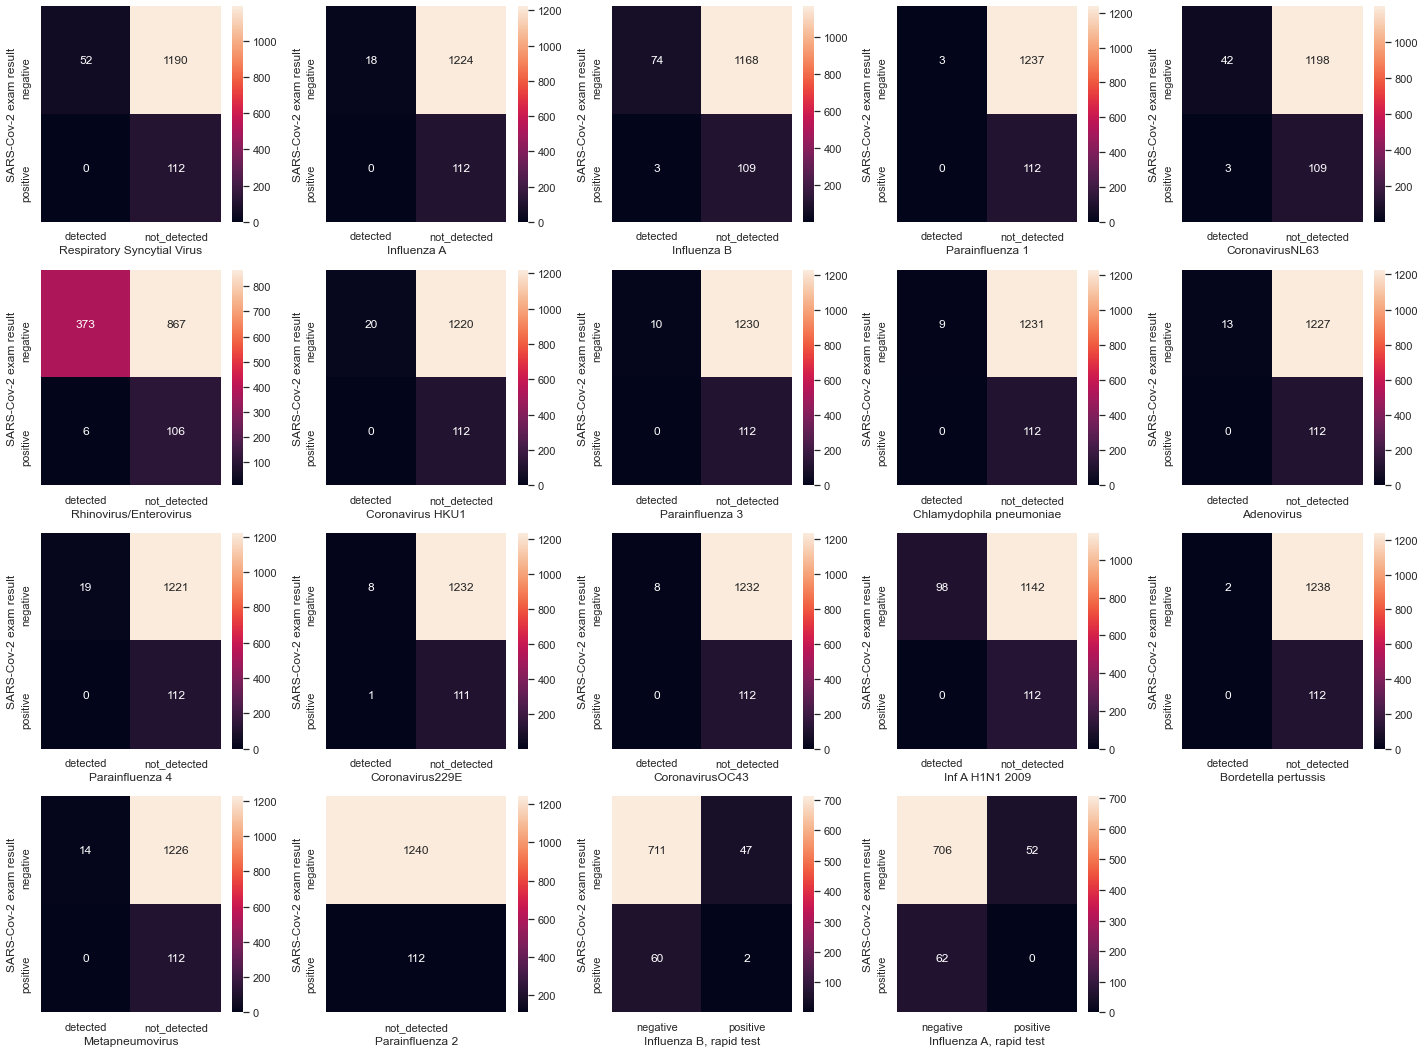

In [14]:
p = int(np.sqrt(viral_var.size))+1
plt.figure(figsize=(20,18))
i = 0
for var in viral_var:
    plt.subplot(p, p, i+1)
    sns.heatmap(pd.crosstab(df[target], df[var]), annot=True, fmt='d')
    i += 1
plt.tight_layout()
plt.show()

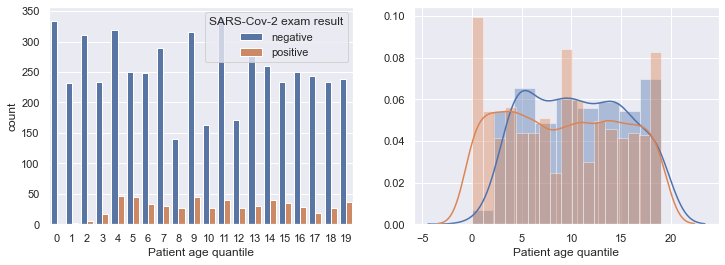

In [15]:
plt.figure(figsize=(12,4))
sns.set()
plt.subplot(121)
sns.countplot(x='Patient age quantile', hue=target, data=df)
plt.subplot(122)
sns.distplot(df_positive['Patient age quantile'], label='positive')
sns.distplot(df_negative['Patient age quantile'], label='negative')
plt.show()

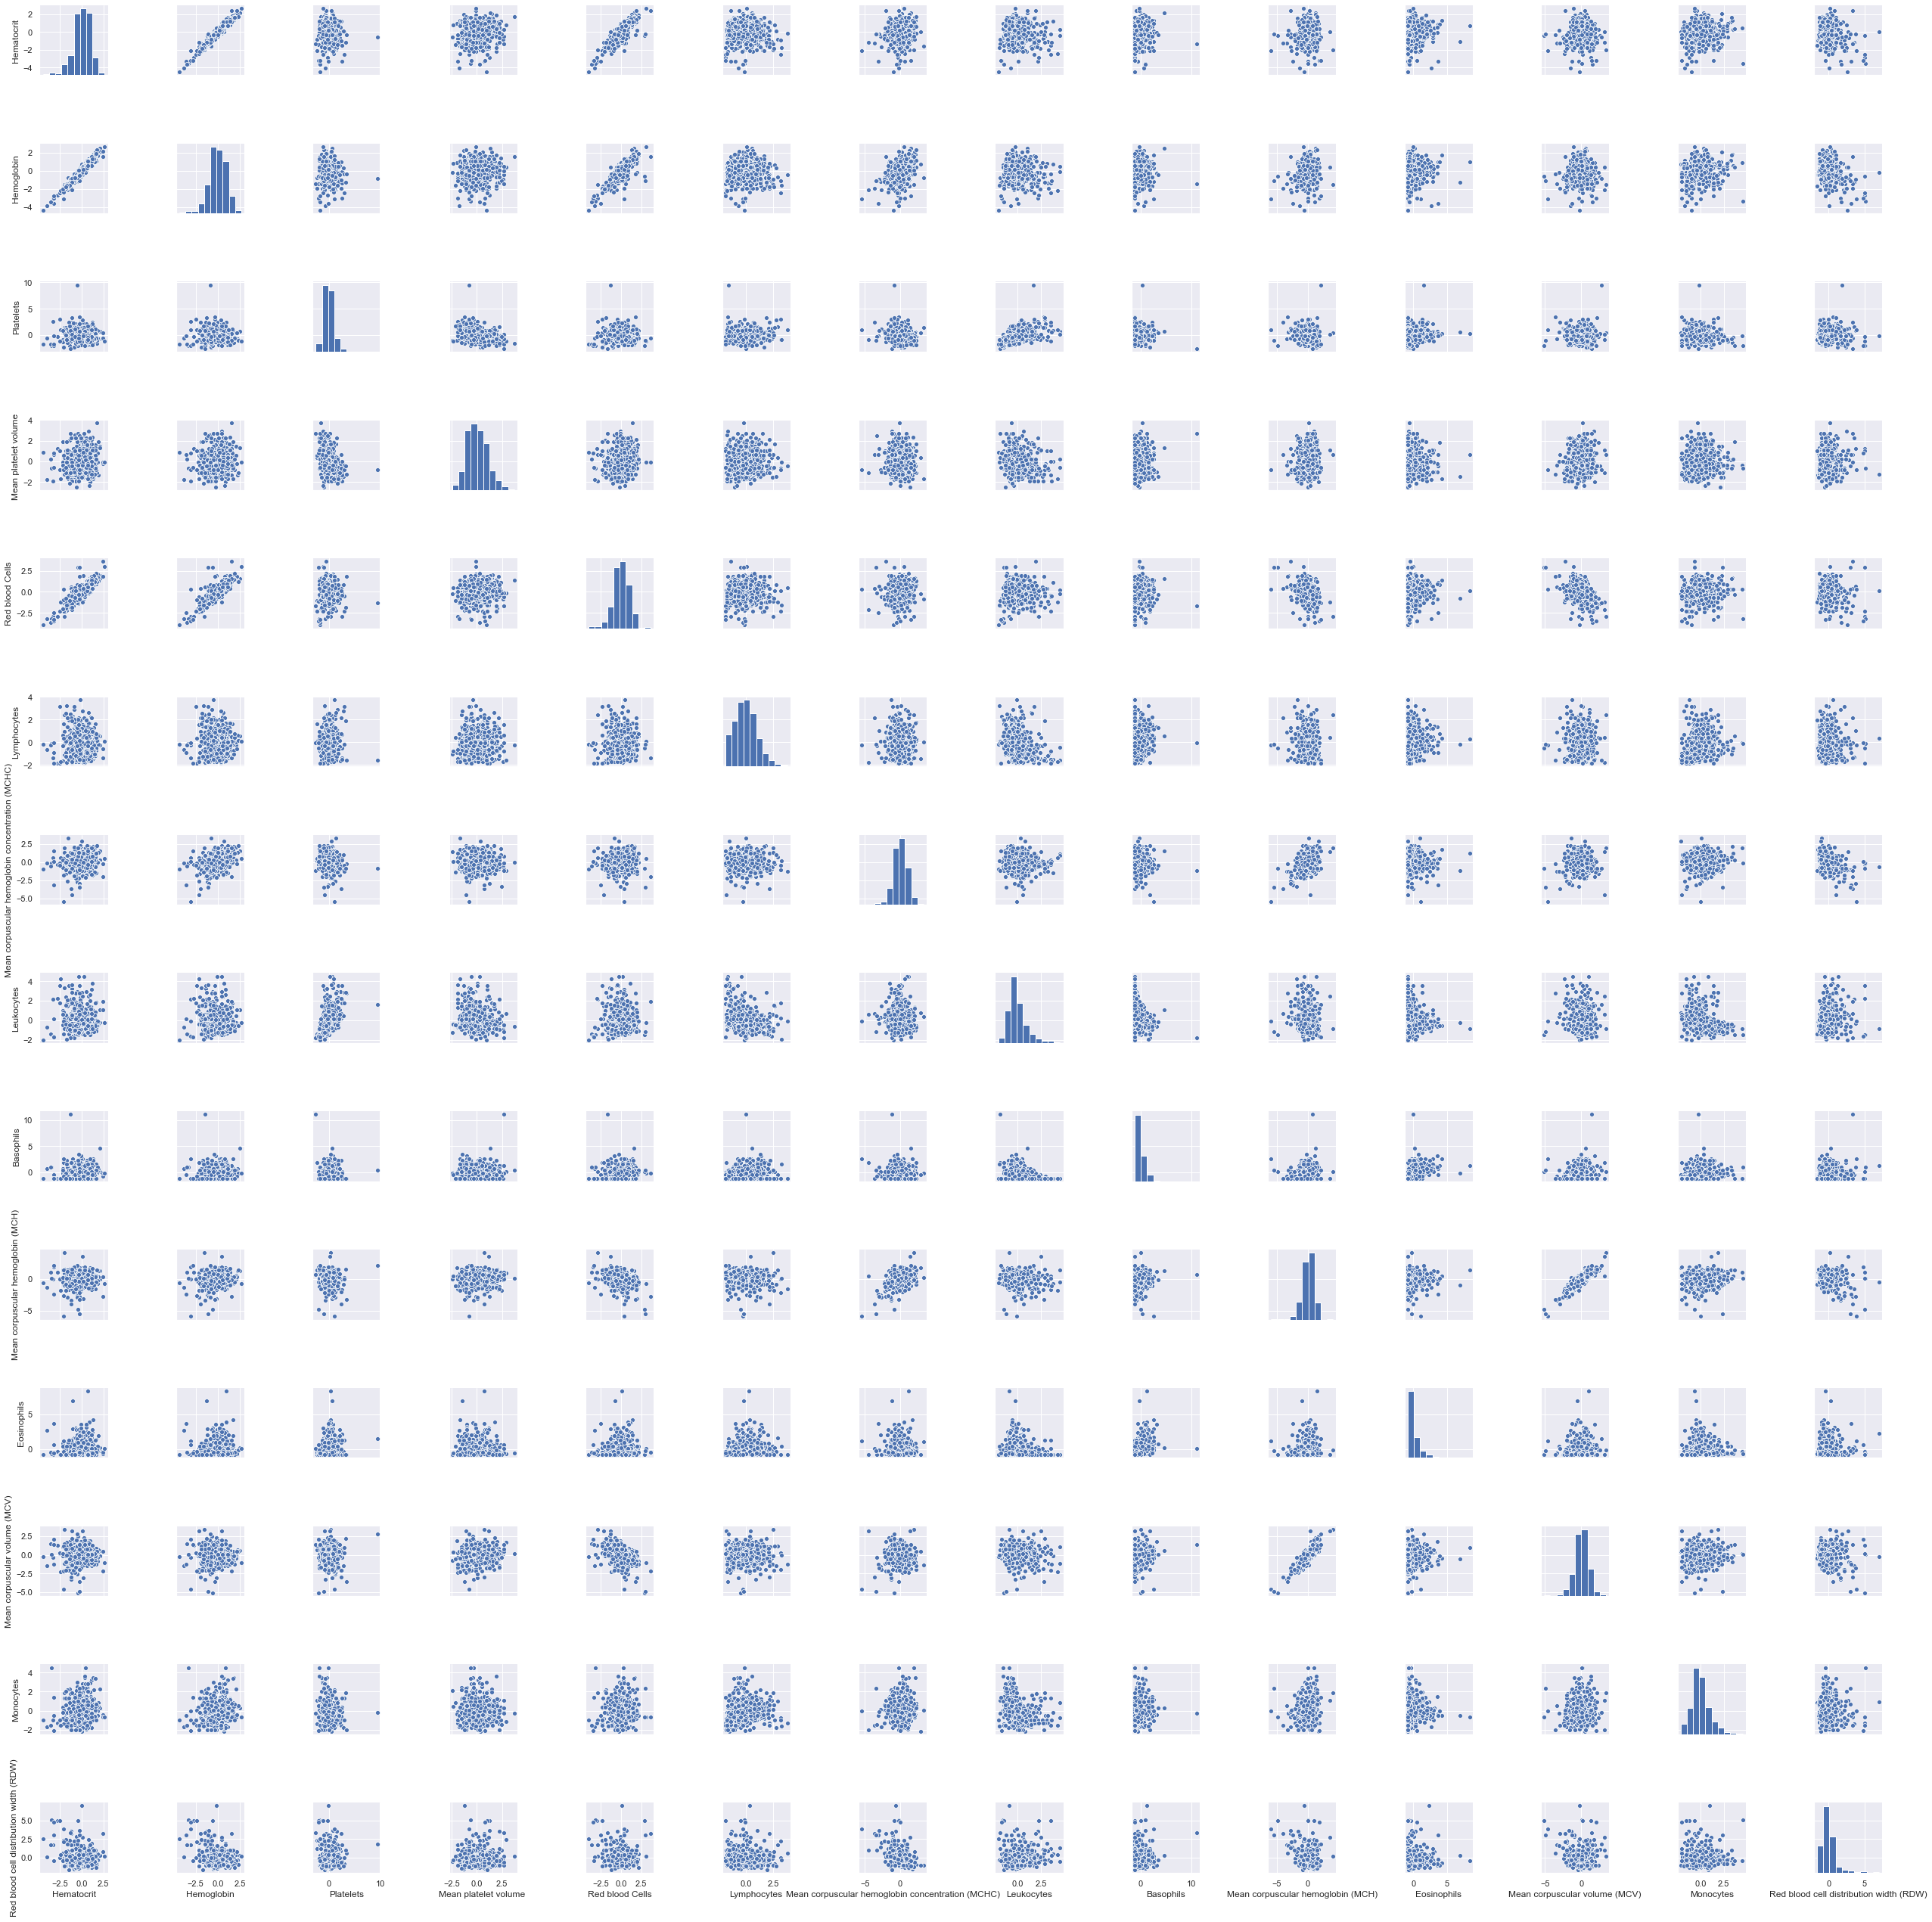

In [16]:
sns.pairplot(df[blood_var])

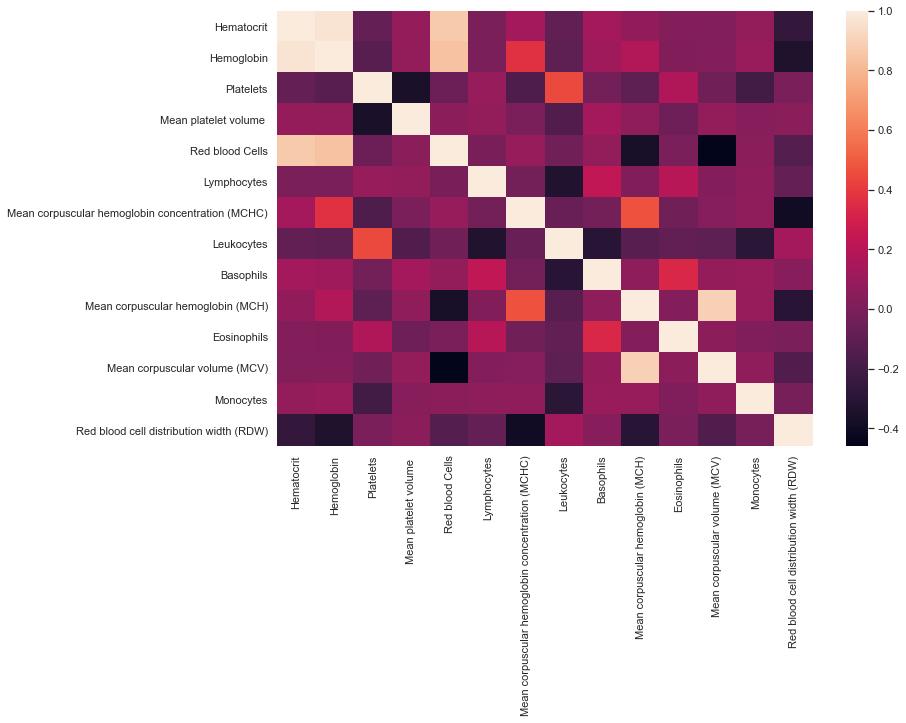

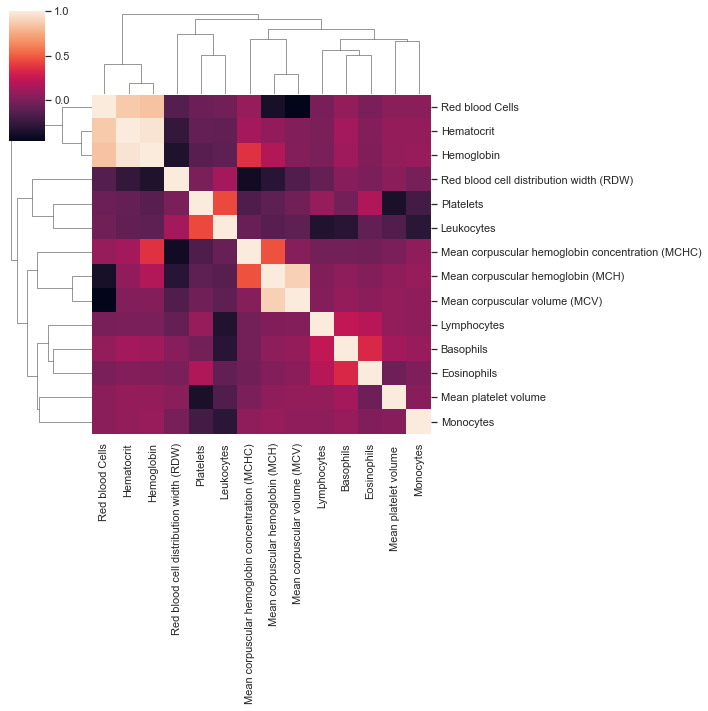

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(df[blood_var].corr())
sns.clustermap(df[blood_var].corr())
plt.show()

<Figure size 864x576 with 0 Axes>

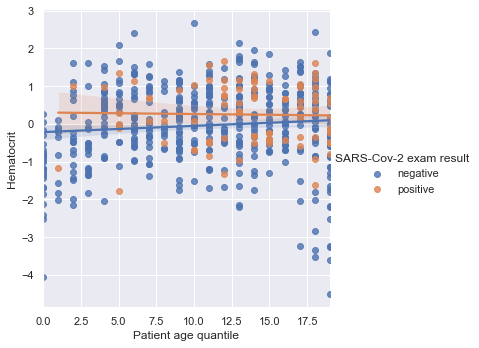

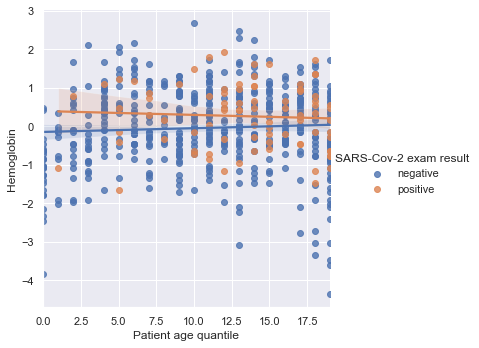

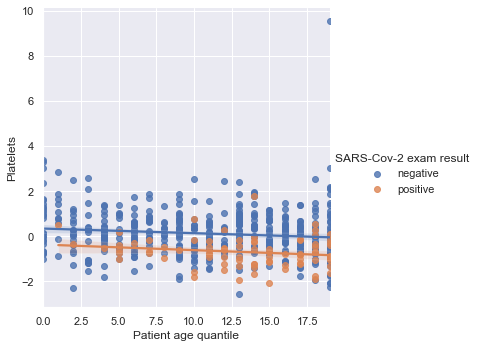

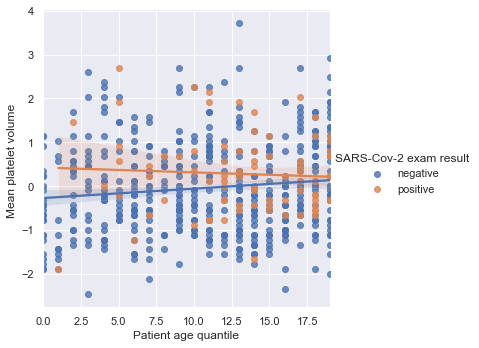

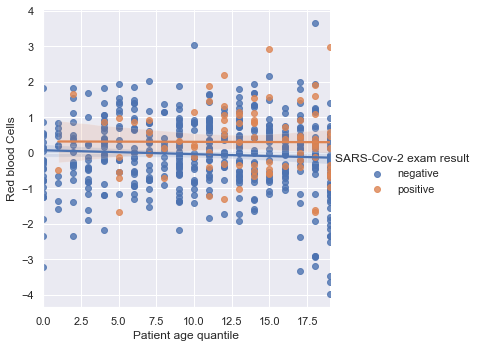

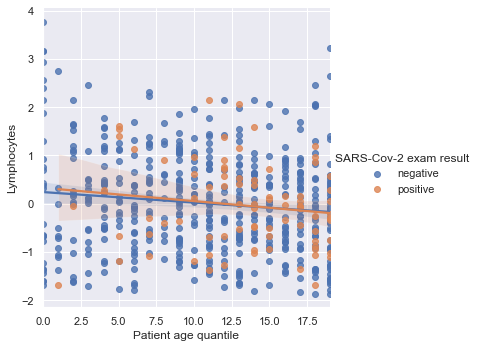

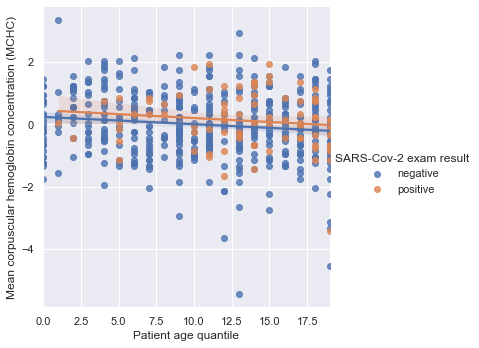

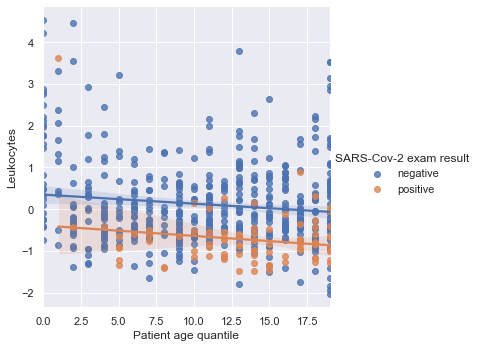

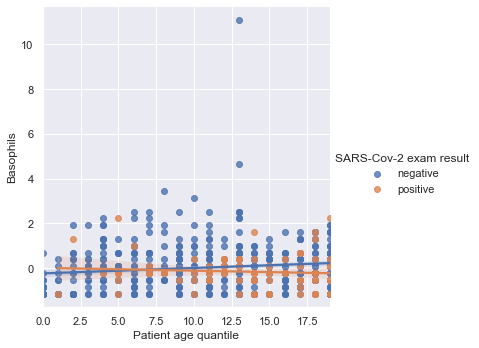

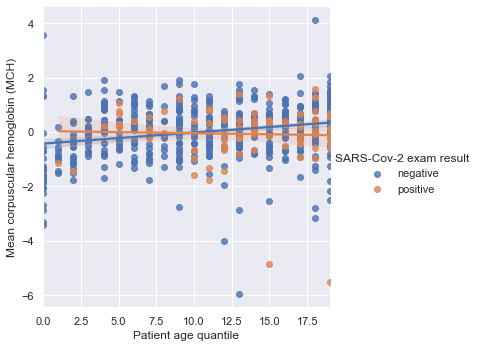

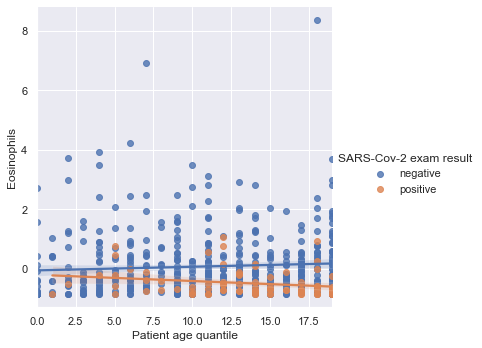

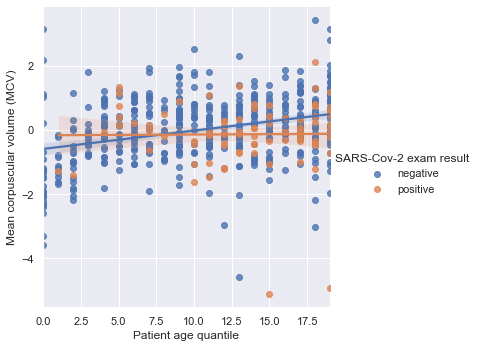

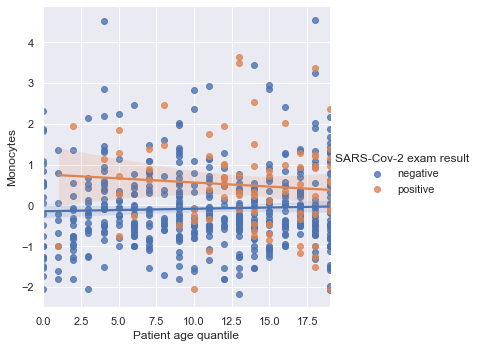

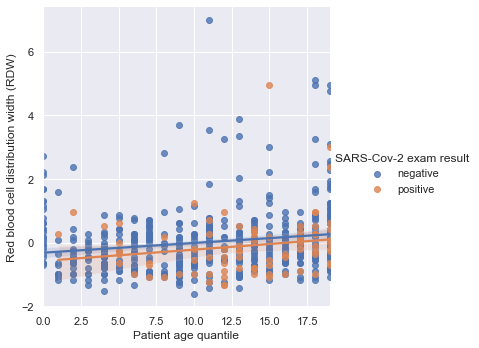

In [18]:
plt.figure(figsize=(12,8))
for var in blood_var:
    sns.lmplot(x='Patient age quantile', y=var, hue=target, data=df)
    plt.show()

In [19]:
df.corr()['Patient age quantile'].sort_values()

Leukocytes                                              -0.166386
Platelets                                               -0.158683
Lymphocytes                                             -0.125935
Mean corpuscular hemoglobin concentration (MCHC)        -0.124671
Red blood Cells                                         -0.037510
Patient addmited to intensive care unit (1=yes, 0=no)   -0.035772
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.015736
Eosinophils                                              0.022085
Patient addmited to regular ward (1=yes, 0=no)           0.046166
Monocytes                                                0.050962
Hemoglobin                                               0.060320
Hematocrit                                               0.096808
Basophils                                                0.107525
Mean platelet volume                                     0.119449
Red blood cell distribution width (RDW)                  0.166429
Mean corpu

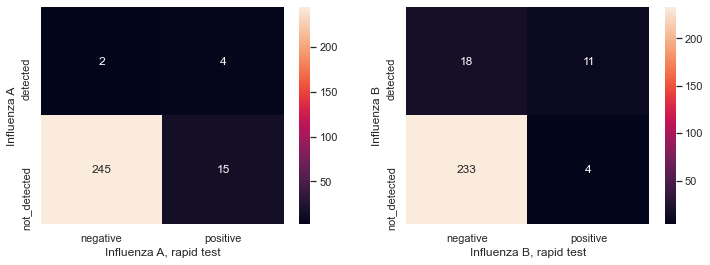

In [20]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.heatmap(pd.crosstab(df['Influenza A'], df['Influenza A, rapid test']), annot=True, fmt='d')
plt.subplot(122)
sns.heatmap(pd.crosstab(df['Influenza B'], df['Influenza B, rapid test']), annot=True, fmt='d')
plt.show()

In [21]:
df['Is tested sick'] = np.sum(df[viral_var[:-2]] == 'detected', axis=1) >=1
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2           

In [22]:
df_sick = df[df['Is tested sick'] == True]
df_notsick = df[df['Is tested sick'] == False]

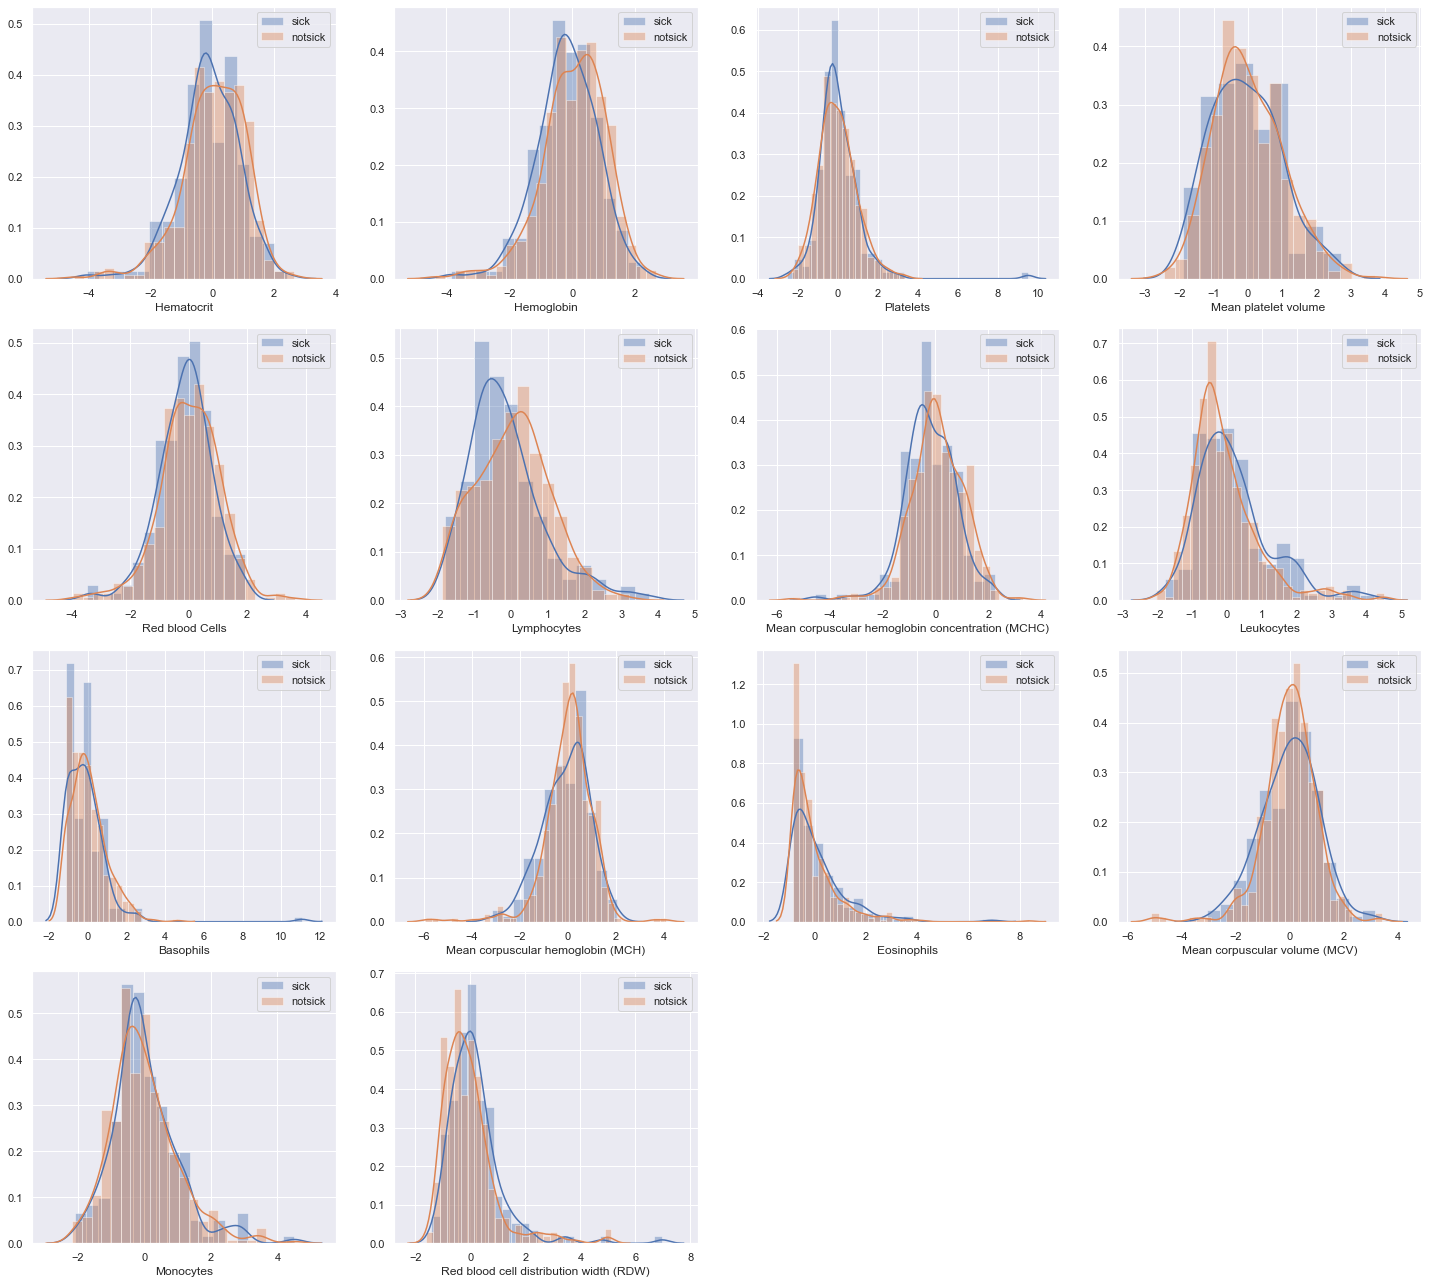

In [23]:
p = int(np.sqrt(blood_var.size))+1
plt.figure(figsize=(20,18))
i = 0
for var in blood_var:
    plt.subplot(p, p, i+1)
    sns.distplot(df_sick[var], label='sick')
    sns.distplot(df_notsick[var], label='notsick')
    plt.legend()
    i += 1
plt.tight_layout()
plt.show()

In [24]:
def hospitalisation(tab):
    if tab['Patient addmited to regular ward (1=yes, 0=no)'] == 1:
        return 'surveillance'
    elif tab['Patient addmited to semi-intensive unit (1=yes, 0=no)'] == 1:
        return 'semi-intensive'
    elif tab['Patient addmited to intensive care unit (1=yes, 0=no)'] == 1:
        return 'intensive'
    else:
        return 'unknown'
    
df['Statut'] = df.apply(hospitalisation, axis=1)
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2           

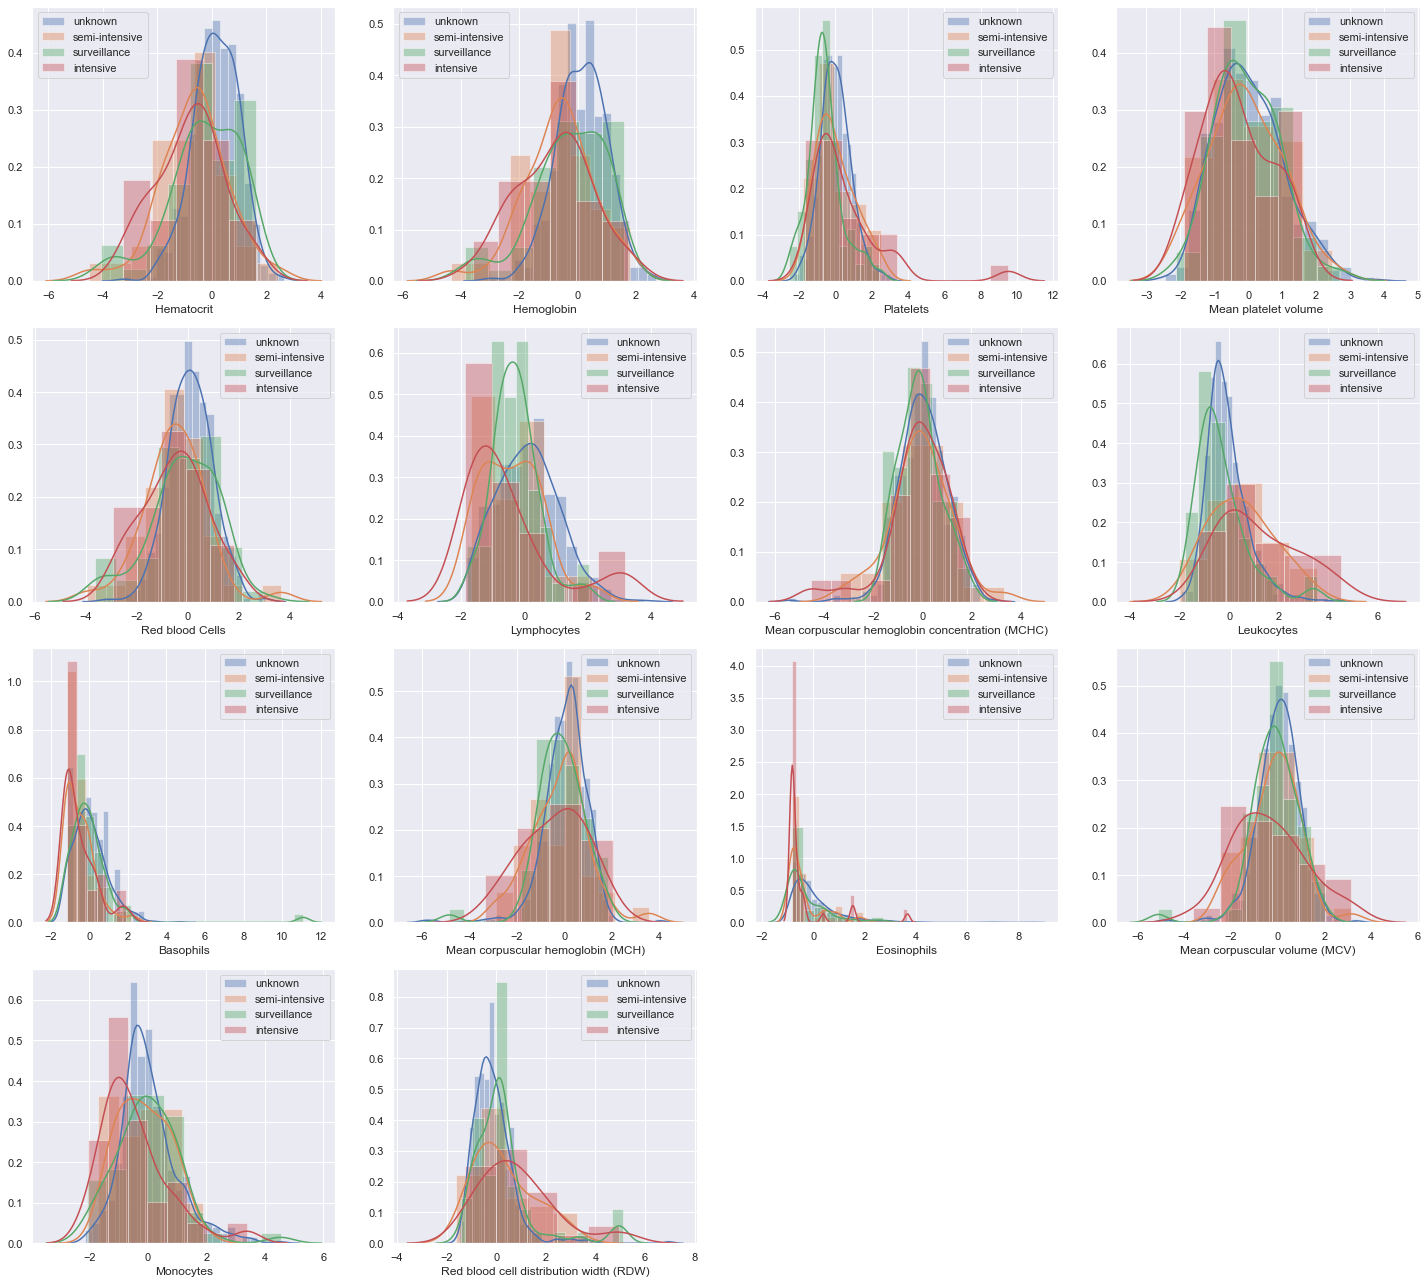

In [25]:
p = int(np.sqrt(blood_var.size))+1
plt.figure(figsize=(20,18))
i = 0
for var in blood_var:
    plt.subplot(p, p, i+1)
    for cat in df['Statut'].unique():
        sns.distplot(df[df['Statut'] == cat][var], label=cat)
    plt.legend()
    i += 1
plt.tight_layout()
plt.show()

In [26]:
df1 = df[viral_var[:-2]].copy()
df1['Covid'] = df['SARS-Cov-2 exam result']
df1.dropna()['Covid'].value_counts(normalize=True)

negative    0.91716
positive    0.08284
Name: Covid, dtype: float64

In [27]:
df2 = df[blood_var[:-2]].copy()
df2['Covid'] = df['SARS-Cov-2 exam result']
df2.dropna()['Covid'].value_counts(normalize=True)

negative    0.864775
positive    0.135225
Name: Covid, dtype: float64

In [28]:
from scipy.stats import ttest_ind

In [29]:
def t_test(col):
    alpha = 0.02
    stat, p = ttest_ind(df_negative.sample(df_positive.shape[0])[col].dropna(), df_positive[col].dropna())
    if p < alpha:
        return 'H0 rejetée'
    else:
        return 0
    
for col in blood_var:
    print(f'{col :-<50} {t_test(col)}')

Hematocrit---------------------------------------- 0
Hemoglobin---------------------------------------- H0 rejetée
Platelets----------------------------------------- H0 rejetée
Mean platelet volume ----------------------------- H0 rejetée
Red blood Cells----------------------------------- 0
Lymphocytes--------------------------------------- 0
Mean corpuscular hemoglobin concentration (MCHC)-- 0
Leukocytes---------------------------------------- H0 rejetée
Basophils----------------------------------------- 0
Mean corpuscular hemoglobin (MCH)----------------- 0
Eosinophils--------------------------------------- H0 rejetée
Mean corpuscular volume (MCV)--------------------- 0
Monocytes----------------------------------------- H0 rejetée
Red blood cell distribution width (RDW)----------- 0


In [30]:
def t_test(col):
    alpha = 0.02
    stat, p = ttest_ind((df_negative.sample(df_positive.shape[0])[col].dropna()=='detected'), (df_positive[col].dropna()=='detected'))
    if p < alpha:
        return 'H0 rejetée'
    else:
        return 0
    
for col in viral_var:
    print(f'{col :-<50} {t_test(col)}')

Respiratory Syncytial Virus----------------------- 0
Influenza A--------------------------------------- 0
Influenza B--------------------------------------- 0
Parainfluenza 1----------------------------------- 0
CoronavirusNL63----------------------------------- 0
Rhinovirus/Enterovirus---------------------------- H0 rejetée
Coronavirus HKU1---------------------------------- 0
Parainfluenza 3----------------------------------- 0
Chlamydophila pneumoniae-------------------------- 0
Adenovirus---------------------------------------- 0
Parainfluenza 4----------------------------------- 0
Coronavirus229E----------------------------------- 0
CoronavirusOC43----------------------------------- 0
Inf A H1N1 2009----------------------------------- H0 rejetée
Bordetella pertussis------------------------------ 0
Metapneumovirus----------------------------------- 0
Parainfluenza 2----------------------------------- 0
Influenza B, rapid test--------------------------- 0
Influenza A, rapid test-----